# Методы оценки эффективности алгоритмов ML

### Receiver Operating Characteristic (ROC) & AUC-value

ROC-кривая является широко используемым инструментом для оценки бинарного классификатора. 
Используется два понятия: **False Positive Rate** и **True Positive Rate**

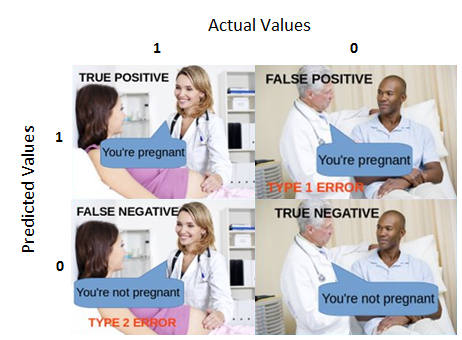

$$\textrm{False Positive Rate} = \frac{FP}{FP+TN}$$
$$\textrm{True Positive Rate} = \frac{TP}{TP+FN}$$

In [53]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X, y = make_classification(n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

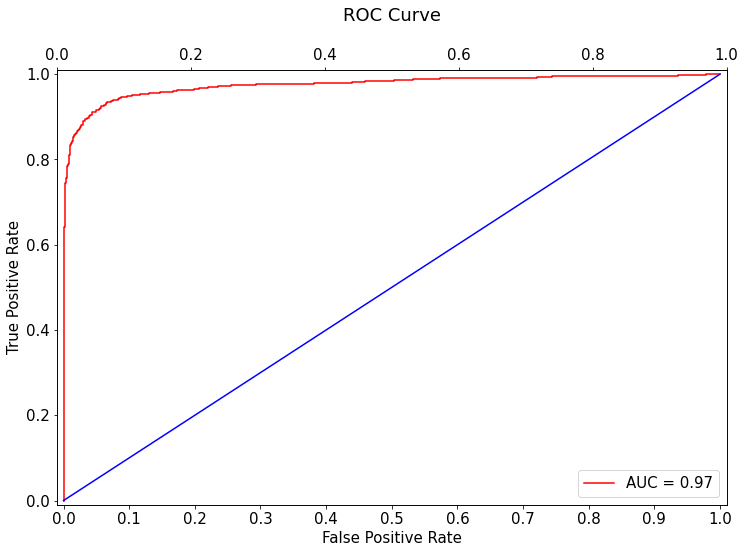

In [25]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.metrics import auc, roc_curve

fig = plt.figure(figsize=(12, 8))
values = []
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
auc_val = 0

def plot_roc(y_test, clf):
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, ths = roc_curve(y_test, y_pred)
    auc_val = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color="red", label="AUC = {0:.2f}".format(auc_val))
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    plt.title("ROC Curve\n")
    ax1.set_xlim((-0.01, 1.01))
    ax1.set_ylim((-0.01, 1.01))
    ax1.set_xticks(np.linspace(0, 1, 11))
    ax1.plot([0, 1], [0, 1], color="blue")
    ax1.legend(loc="lower right")
    plt.show()
    return auc_val

auc_val = plot_roc(y_test, clf)

In [27]:
auc_val

0.9743388973555894

### Как понимать AUC-значение?

<img src="https://d2mk45aasx86xg.cloudfront.net/ROC_Curve_with_positive_rates_d8e0e2516d.webp">

### Какие ещё метрики существуют? Accuracy, Precision, Recall

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$,

Precision = $\frac{TP}{TP + FP}$

*Доля правильных ответов* (Accuracy) $-$ доля правильно классифицированных ответов относительно общего количества элементов в выборке.

*Точность системы* (Precision) в пределах класса $–$ это доля объектов действительно принадлежащих данному классу относительно всех документов, которые система отнесла к этому классу. 

*Полнота системы* (Recall) $–$ это доля найденных классфикатором объектов, принадлежащих классу относительно всех элементов этого класса в тестовой выборке.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg">

**Вопрос**: как вы думаете, какова будет формула для Recall? (в переменных $TP, FP, TN, FN$)

Рассмотрим **пример**. Допустим, у вас есть тестовая выборка, в которой 10 сообщений, из них 4 $-$ спам.

Классификатор пометил 2 сообщения как спам, причем одно действительно является спамом, а второе $-$ нет. 

Мы имеем одно истино-положительное решение, три ложно-отрицательных и одно ложно-положительное. Тогда для класса “спам” точность классификатора составляет 0.5 (50% положительных решений правильные), а полнота 0.25 (классификатор нашел 25% всех спам-сообщений).

### F1-метрика

$$\text{F}_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

**Вопрос:** Как вы думаете, зачем нужна эта метрика?

### Матрица запутанности (confusion matrix)

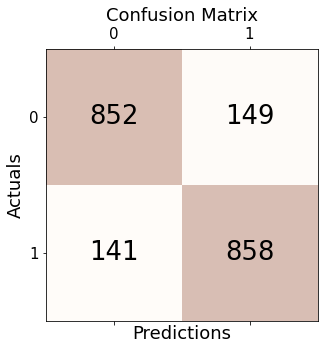

In [54]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#
# Load the breast cancer data set
#
# bc = datasets.load_breast_cancer()
# X = bc.data
# y = bc.target

# #
# # Create training and test split
# #
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)


#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=1, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Вопрос**: чему равны Accuracy, Precision, Recall, F1 для этого классификатора?

In [55]:
print('Precision: %.5f' % precision_score(y_test, y_pred))
print('Recall: %.5f' % recall_score(y_test, y_pred))
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.5f' % f1_score(y_test, y_pred))

Precision: 0.85204
Recall: 0.85886
Accuracy: 0.85500
F1 Score: 0.85543
